In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
Img_size=224
Batch_Size=32

In [5]:
train_data=ImageDataGenerator(rescale=1.255,validation_split=0.2)

In [7]:
train_generator=train_data.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Data',
    target_size=(Img_size,Img_size),
    batch_size=Batch_Size,
    class_mode='binary',
    subset='training'
    )

Found 240 images belonging to 2 classes.


In [8]:
val_generatator=train_data.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Data',
    target_size=(Img_size,Img_size),
    batch_size=Batch_Size,
    class_mode='binary',
    subset='validation'
)

Found 60 images belonging to 2 classes.


In [22]:

model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(Img_size,Img_size, 3)),
    layers.MaxPooling2D([2,2]),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D([2,2]),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D([2,2]),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generatator,batch_size=Batch_Size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5411 - loss: 273.4371 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 14s/step - accuracy: 0.5384 - loss: 262.3234 - val_accuracy: 0.5000 - val_loss: 1.4609
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6369 - loss: 0.6585 - val_accuracy: 0.6500 - val_loss: 0.8742
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7167 - loss: 0.5954 - val_accuracy: 0.7000 - val_loss: 0.5376
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7644 - loss: 0.4031 - val_accuracy: 0.7500 - val_loss: 0.6025
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9590 - loss: 0.2129 - val_accuracy: 0.6833 - val_loss: 1.2302


In [25]:
model.save('/content/drive/MyDrive/Brain_Tumor_Detection/BrainTumor.h5')

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Brain_Tumor_Detection/BrainTumor.h5')
print("Model Loaded")

Model Loaded


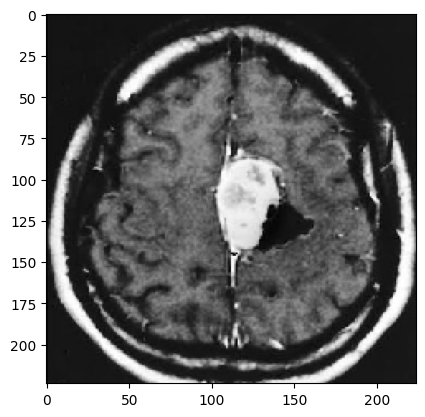

In [28]:
test_image_path="/content/Y2368.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [29]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [30]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
[[0.4968408]]


In [32]:
if prediction>=0.5:
  print("You have a brain tumor")
else:
  print("You don't have a brain tumor")

You don't have a brain tumor
